<a href="https://colab.research.google.com/github/npnavas/MAT_421/blob/main/MAT_421_HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21.1 Numerical Integration Problem Statement  
The idea of numerical integrations is that we're given a function $f:[a,b]\mapsto\mathbb{R}$ and we want to approximate the value of 
$$\int_a^bf(x)dx$$
In order to do this we can break up $[a,b]$ into a grid of $n+1$ (denoted by $x_0,x_1,\cdots x_{n}$, thus making $[a,b] = [x_0,x_n]$) points with spacing $h = \frac{x_n-x_0}{n}$ and use these grid points to help find the area under the function $f$. Throughout this section we'll see various ways to make these approximations.  

# 21.2 Riemann's Integral
The idea of the Riemann integral is to make a rectangle of width $h$ between two points on our grid $x_i$ and $x_{i+1}$ and use either the $f(x_i), f(x_{i+1})$ or $f\left(\frac{x_{i+1}+x_i}{2}\right)$ as the height of the rectangle.

## Left and Right Riemann Integrals
Here $f(x_i)$ and $f(x_{i+1})$ are the simpliest to understand, when $f(x_i)$ as the height it's called the left Riemann Integral since $x_i$ is the left endpoint. Then when $f(x_{i+1})$ as the height it's called the right Riemann Integral since $x_{i+1}$ is the right endpoint. These can be written as 
$$\int_a^b f(x)dx \approx h\sum_{i=0}^{n-1} f(x_i) \text{ Left}$$
$$\int_a^b f(x)dx \approx h\sum_{i=1}^{n} f(x_i) \text{ Right}$$ 
We can see how accurate these approximations are by Taylor expanding the following around $x_i$ we'll get
$$\int_{x_i}^{x_{i+1}} f(x)dx = hf(x) + \mathcal{O}(h^2)$$
which when summing over every sub interval we'll get our accuracy being $\mathcal{O}(h)$.

## Midpoint Riemann Integral
If we want a slightly more accurate Riemann Integrals we can use what's called the midpoint rule, that is using $f\left(\frac{x_{i+1}+x_i}{2}\right)$ as the height of the rectangle. To make notation less clunky we'll say
$$\frac{x_{i+1}+x_i}{2} = z_i.$$
From here this gives us that 
$$\int_a^b f(x)dx \approx h\sum_{i=0}^{n-1}f(z_i).$$
And using a similar analysis as above we'll get that the accuarcy of this is $\mathcal{O}(h^2)$

Here we'll use python to verify these results for the function 
$$f(x) = \frac{x^4\left(1-x\right)^4}{1+x^2}$$

over $[0,1]$, which we know that
$$\int _0^1\frac{x^4\left(1-x\right)^4}{1+x^2}dx =\frac{22}{7}-\pi. $$
Here we'll use 25 gridpoints.

Integral of f using LRI: 0.001264489381557153
Error for LRI: -1.1420747529113096e-10
Integral of f using RRI: 0.001264489381557153
Error for RRI: -1.1420747529113096e-10
Integral of f using MRI: 0.0012644891567110694
Error for MRI: 1.1063860830100303e-10


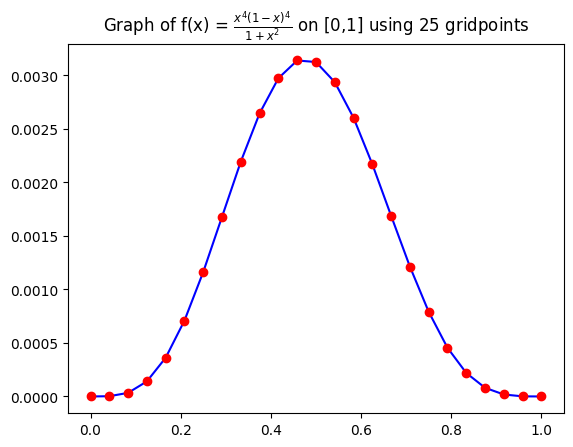

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f(x):
  return ((x**4) * (1-x)**4)/(1+x**2)

x0 = 0
x1 = 1
n = 25
h = (x1-x0)/(n-1)
x = np.linspace(x0, x1, n)
f = f(x)
m = (x[:n-1] + x[1:])/2
fm = ((m**4) * (1-m)**4)/(1+m**2)

I_riemannL = h * sum(f[:n-1])
err_riemannL = ((22/7) - np.pi) - I_riemannL

I_riemannR = h * sum(f[1::])
err_riemannR = ((22/7) - np.pi) - I_riemannR

I_mid = h * sum(fm)
err_mid = ((22/7) - np.pi) - I_mid

print(f"Integral of f using LRI: {I_riemannL}")
print(f"Error for LRI: {err_riemannL}")

print(f"Integral of f using RRI: {I_riemannR}")
print(f"Error for RRI: {err_riemannR}")

print(f"Integral of f using MRI: {I_mid}")
print(f"Error for MRI: {err_mid}")

plt.figure()
plt.title(r"Graph of f(x) = $\frac{x^4\left(1-x\right)^4}{1+x^2}$ on [0,1] using 25 gridpoints")
plt.plot(x, f, 'b')
plt.plot(x, f, "ro")

# 21.3 Trapezoid Rule
Here we can use what's called the Trapezoid rule to approximate integrals. With this we'll let $x_i$ and $x_{i+1}$ be the two parallel segments of a trapezoid while using $h$ as the height of the trapezoid. This means we'll get 
$$\int_a^b f(x)dx \approx h\sum_{i=1}^{n-1}\frac{f(x_i) + f(x_{i+1})}{2}.$$
And using the same analysis as in Section 21.2 we'll get that its accuracy is $\mathcal{O}(h^2)$. We can use python to verify this over the same function as 21.2.

In [16]:
import numpy as np

def f(x):
  return ((x**4) * (1-x)**4)/(1+x**2)

x0 = 0
x1 = 1
n = 25
h = (x1-x0)/(n-1)
x = np.linspace(x0, x1, n)
f = f(x)

I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
err_trap = ((22/7) - np.pi) - I_trap

print(I_trap)
print(err_trap)

0.001264489381557153
-1.1420747529113096e-10
